# Import Libraries Required

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Data Exploration

## Load the Dataset

In [42]:
mobile_data = pd.read_csv('Mobile Data.csv')

## Head and Tail of Dataset

In [3]:
mobile_data.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


In [4]:
mobile_data.tail()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"
540,642,OPPO A77,Sky Blue,128,4,5000,50MP,8MP,0,16.66,Mediatek Helio G35,"15,999"


## Shape of Dataset

In [5]:
mobile_data.shape

(541, 12)

## Dimention of Dataset

In [6]:
mobile_data.ndim

2

## Information of Dataset

In [7]:
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


## Summary of Numerical columns in Dataset

In [8]:
mobile_data.describe()

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,289.711645,110.550832,5.397412,4871.587800,0.062847,16.431201
std,182.359185,60.600694,1.984923,780.148862,0.242911,2.523553
min,0.000000,16.000000,2.000000,800.000000,0.000000,4.500000
25%,135.000000,64.000000,4.000000,5000.000000,0.000000,16.510000
50%,273.000000,128.000000,6.000000,5000.000000,0.000000,16.710000
75%,434.000000,128.000000,8.000000,5000.000000,0.000000,16.940000
max,642.000000,256.000000,8.000000,7000.000000,1.000000,41.940000


## Columns in Dataset

In [9]:
mobile_data.columns

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Prize'],
      dtype='object')

## Drop unnecessary columns

In [10]:
mobile_data.drop('Unnamed: 0',axis = 1, inplace=True)

In [11]:
# Samples of data
mobile_data.sample(4)

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
323,POCO C31,Shadow Gray,64,4,5000,13MP,5MP,0,16.59,MediaTek Helio G35,"8,999"
499,Infinix Note 12 Pro,Tuscany Blue,256,8,5000,108MP,16MP,1,17.02,Mediatek Helio G99,"16,999"
167,realme 8i,Space Purple,128,6,5000,50MP,16MP,0,16.76,MediaTek Helio G96,"17,999"
227,Infinix HOT 20 Play,Fantasy Purple,64,4,6000,13MP,8MP,1,17.32,MediaTek G37,"8,499"


# Data Preprocessing:

## Rename the column Names

In [12]:
mobile_data.rename(columns={'Battery_':'mAH of Battery','Rear Camera':'Rear Camera(In MP)','Front Camera':'Front Camera(In MP)','Processor_':'Processor in Phone','Prize':'Price of Phone'},inplace=True)

In [13]:
#New columns in datset
mobile_data.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'mAH of Battery',
       'Rear Camera(In MP)', 'Front Camera(In MP)', 'AI Lens', 'Mobile Height',
       'Processor in Phone', 'Price of Phone'],
      dtype='object')

### Extract MP from Both the columns of camera as it will create problem in model training

In [14]:
# Make function to extract integer from mixed value
import re
def int_extracter(x):
    return re.search('\d+',x).group()
int_extracter('20MP')

'20'

### Apply function to Rear Camera columns usning lambda function

In [15]:
mobile_data['Rear Camera(In MP)'] = mobile_data['Rear Camera(In MP)'].apply(lambda x:int_extracter(x))

### Apply function to Front Camera columns usning lambda function

In [16]:
mobile_data['Front Camera(In MP)'] = mobile_data['Front Camera(In MP)'].apply(lambda x:int_extracter(x))

In [17]:
mobile_data.sample(4)

,Model,Colour,Memory,RAM,mAH of Battery,Rear Camera(In MP),Front Camera(In MP),AI Lens,Mobile Height,Processor in Phone,Price of Phone
283,REDMI Note 12 Pro+ 5G,Arctic White,256,2,4980,200,16,0,16.94,Mediatek Dimensity 1080,"32,999"
232,POCO X5 5G,Supernova Green,256,8,5000,48,13,0,16.94,Qualcomm Snapdragon 695,"17,999"
175,POCO X5 Pro 5G,Astral Black,256,8,5000,108,16,0,16.94,Qualcomm Snapdragon 778G,"23,999"
400,MOTOROLA Edge 30 Ultra,Interstellar Black,256,4,4610,200,60,0,16.94,Qualcomm Snapdragon 8+ Gen 1,"49,999"


## Convert data type of Both Camera columns and Price column by numerical

In [18]:
mobile_data['Price of Phone'] = mobile_data['Price of Phone'].str.replace(',', '').astype(float)

In [19]:
mobile_data['Rear Camera(In MP)'] = mobile_data['Rear Camera(In MP)'].str.replace(',', '').astype(int)
mobile_data['Front Camera(In MP)'] = mobile_data['Front Camera(In MP)'].str.replace(',', '').astype(int)

## Check Null values

In [20]:
mobile_data.isnull().sum()

Model                  0
Colour                 0
Memory                 0
RAM                    0
mAH of Battery         0
Rear Camera(In MP)     0
Front Camera(In MP)    0
AI Lens                0
Mobile Height          0
Processor in Phone     0
Price of Phone         0
dtype: int64

No Null Values are there in dataset

In [21]:
# Check data types information
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Model                541 non-null    object 
 1   Colour               541 non-null    object 
 2   Memory               541 non-null    int64  
 3   RAM                  541 non-null    int64  
 4   mAH of Battery       541 non-null    int64  
 5   Rear Camera(In MP)   541 non-null    int32  
 6   Front Camera(In MP)  541 non-null    int32  
 7   AI Lens              541 non-null    int64  
 8   Mobile Height        541 non-null    float64
 9   Processor in Phone   541 non-null    object 
 10  Price of Phone       541 non-null    float64
dtypes: float64(2), int32(2), int64(4), object(3)
memory usage: 42.4+ KB


## Check outliers

<Axes: ylabel='Price of Phone'>

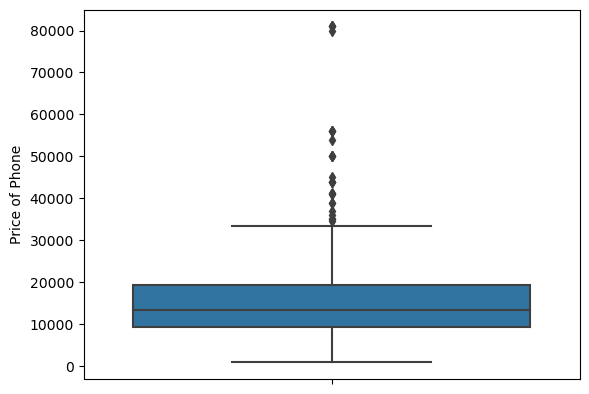

In [22]:
sns.boxplot(data = mobile_data,y = 'Price of Phone')

### Make function to Handle outliers in column with IQR method by capping

In [23]:
def iqr_technique(DFcolumn):
    Q1 = np.percentile(DFcolumn, 25)
    Q3 = np.percentile(DFcolumn, 75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [24]:
# Make variables for lower and upper limit
lower_limit_iqr,upper_limit_iqr = iqr_technique(mobile_data['Price of Phone'])

In [25]:
# Cap the outliers
mobile_data['Price of Phone'] = np.where(mobile_data['Price of Phone']>upper_limit_iqr,upper_limit_iqr,np.where(mobile_data['Price of Phone']<lower_limit_iqr,lower_limit_iqr,mobile_data['Price of Phone']))

## Box plot of price after handling outliers

<Axes: ylabel='Price of Phone'>

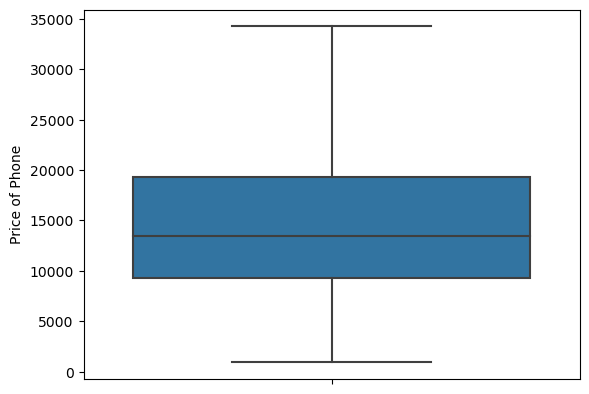

In [26]:
sns.boxplot(data = mobile_data,y = 'Price of Phone')

## Check duplicate Values in Dataset and remove them

In [27]:
print("\nDuplicate Rows:")
print(mobile_data[mobile_data.duplicated()])


Duplicate Rows:
                     Model          Colour  Memory  RAM  mAH of Battery  \
27             vivo T2x 5G     Marine Blue     128    6            5000   
48            MOTOROLA e32     Arctic Blue      64    4            5000   
91   SAMSUNG Galaxy F14 5G   B.A.E. Purple     128    4            6000   
132  SAMSUNG Galaxy F14 5G       OMG Black     128    6            6000   
247              redmi min             M3)      16    4            1000   
344         Tecno Spark 9T  Turquoise Cyan      64    4            5000   
352         POCO X4 Pro 5G     Laser Black     128    8            5000   
424            realme C30s    Stripe Black      64    4            5000   
437           vivo Y100 5G    Pacific Blue     128    8            4500   
480               POCO C31      Royal Blue      64    4            5000   

     Rear Camera(In MP)  Front Camera(In MP)  AI Lens  Mobile Height  \
27                   50                    8        0          16.71   
48           

In [28]:
# Drop Duplicates
mobile_data.drop_duplicates(inplace=True)

## Convert categorical variables in to numerical variables using one-hot encoding

In [29]:
categorical_cols = ['Model', 'Colour', 'Processor in Phone']
encoded_mobile_data = pd.get_dummies(mobile_data,columns=categorical_cols,drop_first=True,dtype=int)

In [30]:
encoded_mobile_data

,Memory,RAM,mAH of Battery,Rear Camera(In MP),Front Camera(In MP),AI Lens,Mobile Height,Price of Phone,Model_APPLE iPhone 12,Model_APPLE iPhone 14 Plus,...,Processor in Phone_Unisoc Spreadtrum SC9863A1,Processor in Phone_Unisoc T606,Processor in Phone_Unisoc T610,Processor in Phone_Unisoc T612,Processor in Phone_Unisoc T612 processor,Processor in Phone_Unisoc T616,Processor in Phone_Unisoc Tiger T612 (12 nm),Processor in Phone_Unisoc Tiger T616,Processor in Phone_ios,Processor in Phone_snapdragon 888
0,64,4,6000,13,5,1,16.76,7299.0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,64,4,6000,13,5,1,16.76,7299.0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,128,8,5000,50,16,0,16.64,11999.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,32,2,5000,8,5,0,16.56,5649.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,128,8,5000,50,5,1,16.76,8999.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,256,8,3900,50,12,0,15.49,34265.0,0,0,...,0,0,0,0,0,0,0,0,0,0
537,32,2,3100,5,2,0,12.70,5998.0,0,0,...,0,0,0,0,0,0,0,0,0,0
538,64,4,5000,50,8,0,16.76,9990.0,0,0,...,0,0,0,0,0,0,0,0,0,0
539,128,8,5000,50,32,0,16.26,34265.0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Visualize the relation between Phone price and AI Lens

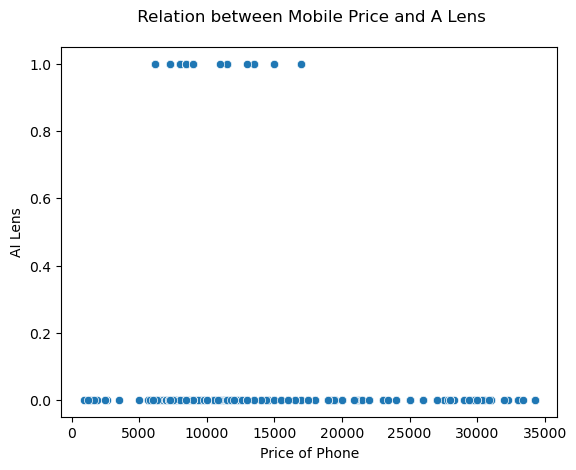

In [31]:
sns.scatterplot(data = mobile_data,x = 'Price of Phone',y= 'AI Lens')
plt.title(' Relation between Mobile Price and A Lens\n')
plt.show()

There is no meaningful information in AI Lens Feature

## Visualize the relation between Phone price and Mobile Height

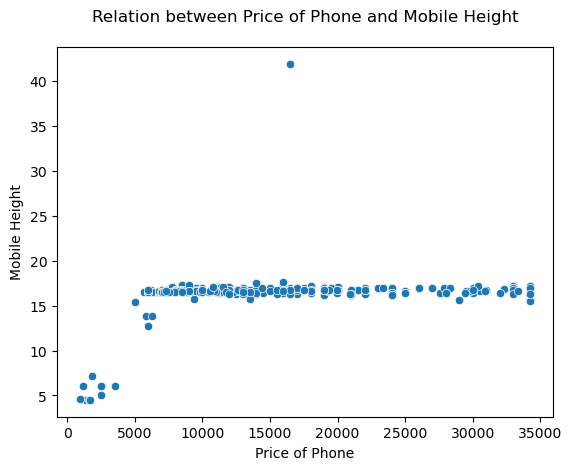

In [32]:
sns.scatterplot(data = mobile_data,x = 'Price of Phone',y= 'Mobile Height')
plt.title('Relation between Price of Phone and Mobile Height\n')
plt.show()

There is no meaningful information in Mobile Height Feature

# Feature Extraction

## Remove AI Lens and Mobile hight columns as these features are not affecting the price of Mobile

In [33]:
encoded_mobile_data.drop(['AI Lens','Mobile Height'],axis = 1, inplace=True)

In [34]:
#Head of encoded Data
encoded_mobile_data.head()

,Memory,RAM,mAH of Battery,Rear Camera(In MP),Front Camera(In MP),Price of Phone,Model_APPLE iPhone 12,Model_APPLE iPhone 14 Plus,Model_Google Pixel 6a,Model_Google Pixel 7,...,Processor in Phone_Unisoc Spreadtrum SC9863A1,Processor in Phone_Unisoc T606,Processor in Phone_Unisoc T610,Processor in Phone_Unisoc T612,Processor in Phone_Unisoc T612 processor,Processor in Phone_Unisoc T616,Processor in Phone_Unisoc Tiger T612 (12 nm),Processor in Phone_Unisoc Tiger T616,Processor in Phone_ios,Processor in Phone_snapdragon 888
0,64,4,6000,13,5,7299.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,64,4,6000,13,5,7299.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,128,8,5000,50,16,11999.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,32,2,5000,8,5,5649.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,128,8,5000,50,5,8999.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Correlation of standard Mobile data

In [36]:
correlation_matrix = mobile_data.corr(numeric_only=True)

In [37]:
correlation_matrix

,Memory,RAM,mAH of Battery,Rear Camera(In MP),Front Camera(In MP),AI Lens,Mobile Height,Price of Phone
Memory,1.000000,0.624728,-0.070355,0.527890,0.493396,-0.096529,0.050946,0.674231
RAM,0.624728,1.000000,-0.112560,0.437132,0.491954,-0.083673,0.089294,0.649396
mAH of Battery,-0.070355,-0.112560,1.000000,0.191132,0.021995,0.153704,0.684077,0.017919
Rear Camera(In MP),0.527890,0.437132,0.191132,1.000000,0.502209,-0.044825,0.232984,0.535294
Front Camera(In MP),0.493396,0.491954,0.021995,0.502209,1.000000,-0.113775,0.201570,0.649018
AI Lens,-0.096529,-0.083673,0.153704,-0.044825,-0.113775,1.000000,0.051182,-0.181871
Mobile Height,0.050946,0.089294,0.684077,0.232984,0.201570,0.051182,1.000000,0.222973
Price of Phone,0.674231,0.649396,0.017919,0.535294,0.649018,-0.181871,0.222973,1.000000


## Heat map of dataset

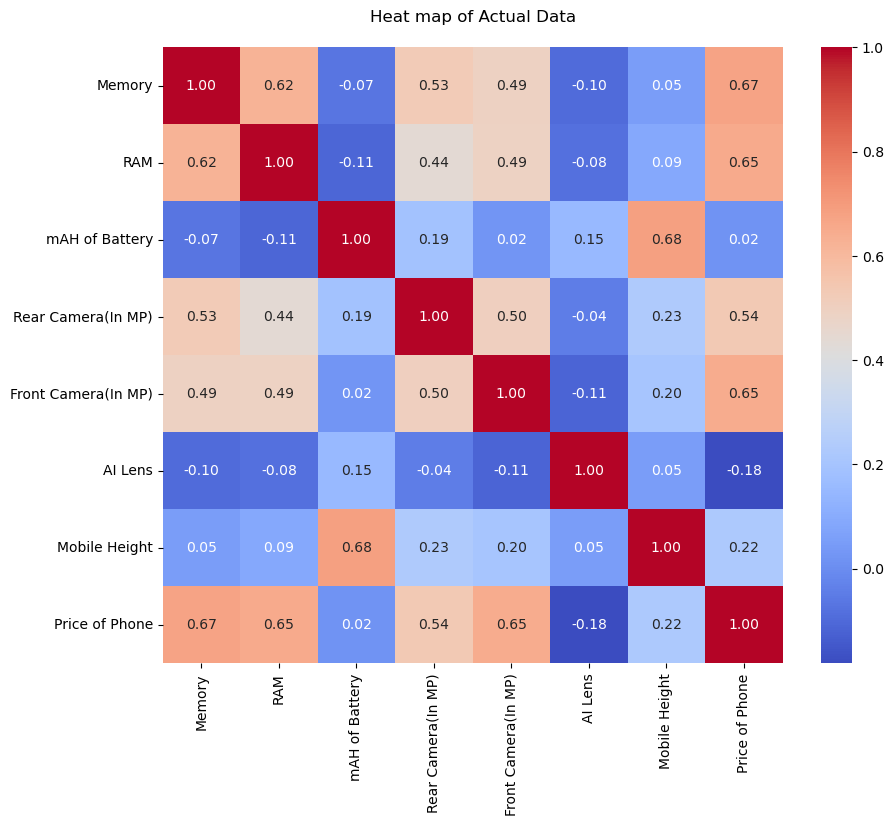

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot= True,cmap='coolwarm',fmt=".2f")
plt.title('Heat map of Actual Data\n')
plt.show()